**1.importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

**2.importing your data set**

In [ ]:
df=pd.read_csv(r"/content/CarPrice_Assignment.csv")

# view your data

**3.view your data**

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**transpose it to see all the features**

In [ ]:
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**start cleaning your data**
first checking nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isna().sum().sum()

0

**checking unwanted features**

In [ ]:
df.drop(labels='compressionratio',axis=1,inplace=True)
df.drop(columns='drivewheel',axis=1,inplace=True) 
df.drop(columns='boreratio',axis=1,inplace=True) 
df.drop(columns='doornumber',axis=1,inplace=True) 

In [ ]:
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
carbody,convertible,convertible,hatchback,sedan,sedan
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4
carlength,168.8,168.8,171.2,176.6,176.6
carwidth,64.1,64.1,65.5,66.2,66.4


**create new coloumn for car area**





In [ ]:
#insert it as the first column to easy slicing while spliting data
df.insert(0, 'car_area',"Any")
df['car_area']=df['carlength']*df['carwidth']  #######*df['carheight']


In [ ]:
df.drop(columns='carlength',axis=1,inplace=True)
df.drop(columns='carwidth',axis=1,inplace=True)
df.drop(columns='carheight',axis=1,inplace=True)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_area,10820.08,10820.08,11213.6,11690.92,11726.24,11754.99,13758.78,13758.78,13758.78,12099.78,...,12687.36,12687.36,12687.36,12687.36,12687.36,13008.32,12989.44,13008.32,13008.32,13008.32
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),...,volvo 144ea,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
curbweight,2548,2548,2823,2337,2824,2507,2844,2954,3086,3053,...,3034,2935,3042,3045,3157,2952,3049,3012,3217,3062


**now dealing with non numirical values**

**counting distint values to choose the suitable way for encoding**

In [ ]:
df.CarName.nunique()

147

In [ ]:
df.fueltype.nunique()


2

In [ ]:
df.aspiration.nunique()

2

In [ ]:
df.carbody.nunique()

5

In [ ]:
df.enginelocation.nunique()

2

In [ ]:
df.enginetype.nunique()

7

In [ ]:
df.cylindernumber.nunique()

7

In [ ]:
df.fuelsystem.nunique()

8

**taking desicion**


**they are all few number of categories except car name**


**so,lets try ordinal encoding**

In [ ]:
#df = pd.get_dummies(df, columns = ['fueltype','doornumber','drivewheel','fuelsystem'])
df.drop(columns='CarName',axis=1,inplace=True)
df=df.apply(LabelEncoder().fit_transform)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_area,24,24,31,49,50,51,78,78,78,57,...,66,66,66,66,66,72,71,72,72,72
car_ID,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,5,5,3,4,4,4,3,3,3,2,...,1,0,1,0,1,1,1,1,1,1
fueltype,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
aspiration,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,0,1,1
carbody,0,0,2,3,3,3,3,4,3,2,...,4,3,4,3,4,3,3,3,3,3
enginelocation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wheelbase,2,2,10,30,28,30,42,42,42,29,...,39,39,39,39,39,46,46,46,46,46
curbweight,92,92,115,66,116,87,118,126,142,136,...,132,124,133,134,149,125,135,129,151,139
enginetype,0,0,5,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,5,3,3


**now we have to check if there is outliers**

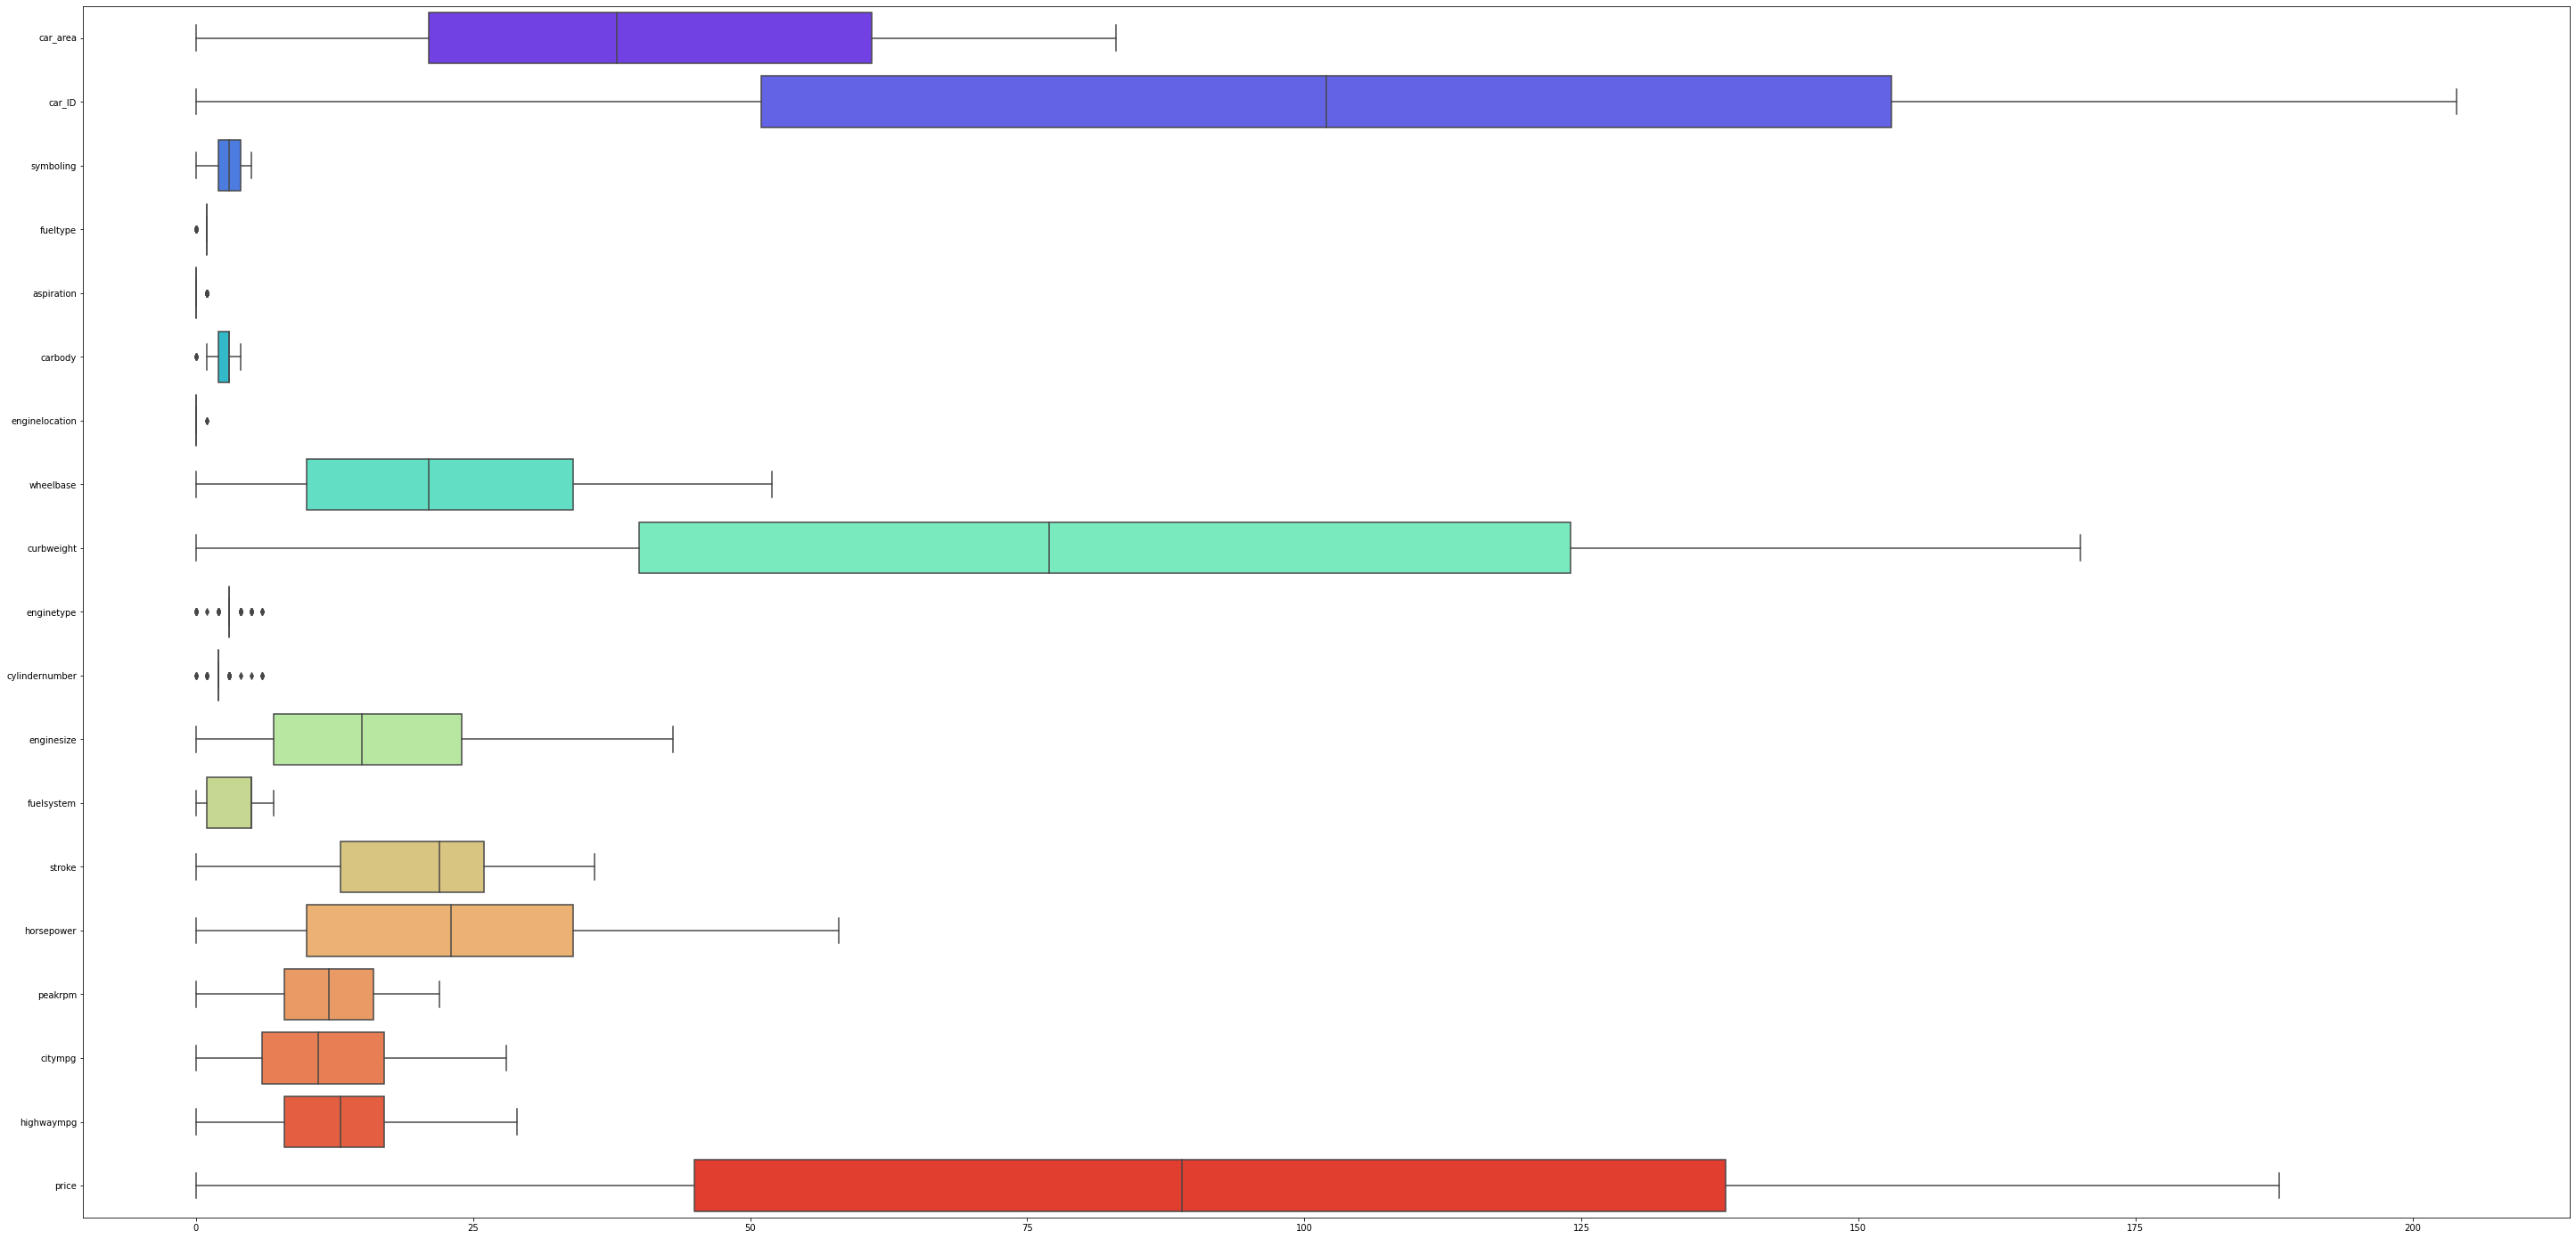

In [ ]:
# Boxplot to see if there is outliers
plt.figure(figsize= (50,25))
sb.boxplot(data=df,palette='rainbow',orient='h')

**too many outliers in engine type and cylindernumber**

In [ ]:
df.drop(columns='enginetype',axis=1,inplace=True) 
df.drop(columns='enginelocation',axis=1,inplace=True) 
df.drop(columns='carbody',axis=1,inplace=True)
df.drop(columns='aspiration',axis=1,inplace=True)  
df.drop(columns='cylindernumber',axis=1,inplace=True) #enginesize


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_area,24,24,31,49,50,51,78,78,78,57,...,66,66,66,66,66,72,71,72,72,72
car_ID,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,5,5,3,4,4,4,3,3,3,2,...,1,0,1,0,1,1,1,1,1,1
fueltype,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
wheelbase,2,2,10,30,28,30,42,42,42,29,...,39,39,39,39,39,46,46,46,46,46
curbweight,92,92,115,66,116,87,118,126,142,136,...,132,124,133,134,149,125,135,129,151,139
enginesize,18,18,28,11,22,22,22,22,19,19,...,24,24,24,18,18,24,24,33,25,24
fuelsystem,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,3,5
stroke,4,4,28,25,25,25,25,25,25,25,...,15,15,15,15,15,15,15,7,25,15
horsepower,30,30,45,27,33,29,29,29,40,48,...,32,32,32,50,50,32,48,38,28,32


**checking for corelations**

<function matplotlib.pyplot.show(*args, **kw)>

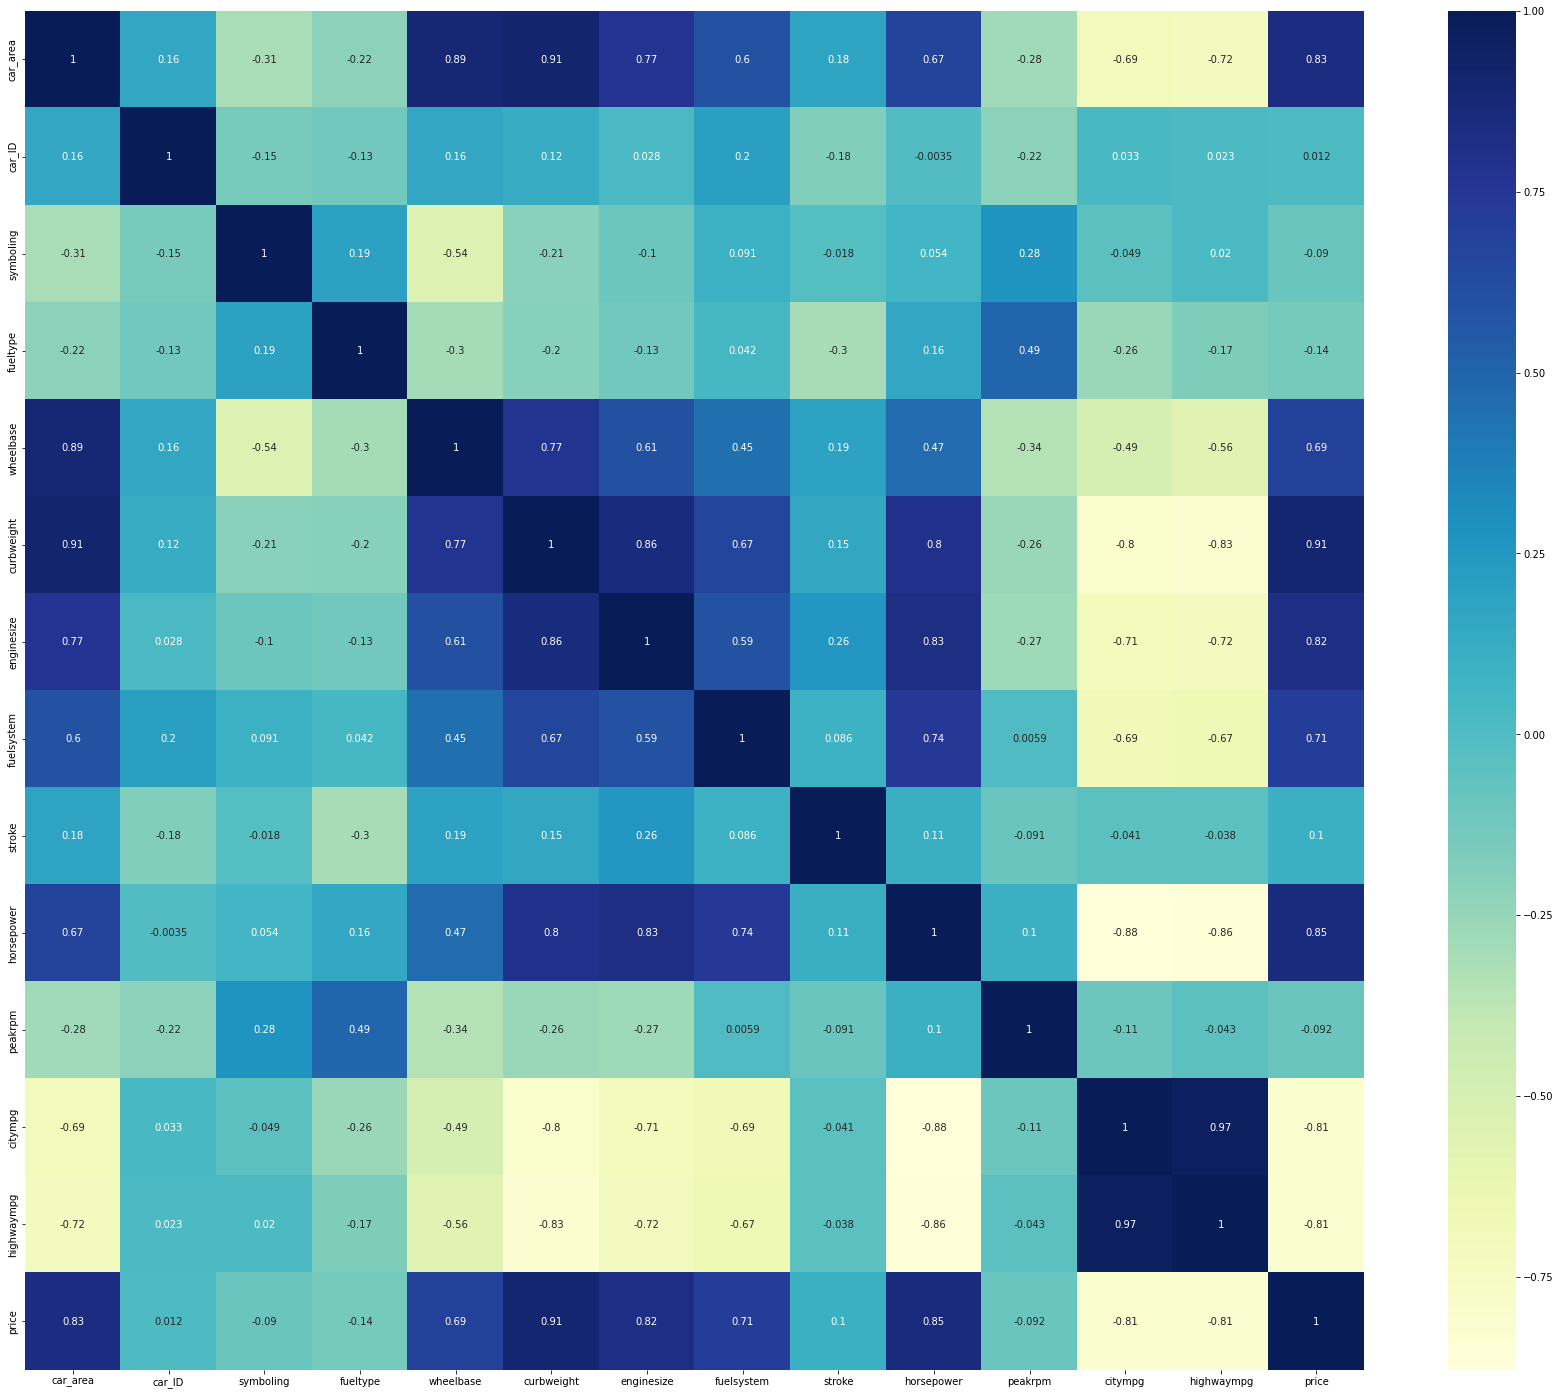

In [ ]:
#corelations
plt.figure(figsize=(30,25))
sb.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show

In [ ]:
#duo to high colinearity between enginesize and other features 
df.drop(columns='enginesize',axis=1,inplace=True) 

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,highwaympg,121.81
10,citympg,99.37
5,curbweight,49.41
0,car_area,49.38
12,price,37.29
8,horsepower,29.71
4,wheelbase,29.20
3,fueltype,15.48
2,symboling,10.59
6,fuelsystem,9.99


In [ ]:
#dropping high corelated features with other features
df.drop(columns='highwaympg',axis=1,inplace=True) 

**scaling**

In [ ]:
#from df.describe we want to scale curbweight,peakrpm,price
scaler=MinMaxScaler()
M = df['curbweight'].to_numpy()
df['curbweight']=scaler.fit_transform(M.reshape(-1,1))

M = df['peakrpm'].to_numpy()
df['peakrpm']=scaler.fit_transform(M.reshape(-1,1))

M = df['price'].to_numpy()
df['price']=scaler.fit_transform(M.reshape(-1,1))

In [ ]:
df

,car_area,car_ID,symboling,fueltype,wheelbase,curbweight,fuelsystem,stroke,horsepower,peakrpm,citympg,price
0,24,0,5,1,2,0.541176,5,4,30,0.454545,8,0.627660
1,24,1,5,1,2,0.541176,5,4,30,0.454545,8,0.728723
2,31,2,3,1,10,0.676471,5,28,45,0.454545,6,0.728723
3,49,3,4,1,30,0.388235,5,25,27,0.727273,11,0.654255
4,50,4,4,1,28,0.682353,5,25,33,0.727273,5,0.787234
...,...,...,...,...,...,...,...,...,...,...,...,...
200,72,200,1,1,46,0.735294,5,15,32,0.681818,10,0.760638
201,71,201,1,1,46,0.794118,5,15,48,0.636364,6,0.856383
202,72,202,1,1,46,0.758824,5,7,38,0.727273,5,0.877660
203,72,203,1,0,46,0.888235,3,25,28,0.363636,13,0.888298


**finally,making the model with sklearn**

In [ ]:
# Splitting data features & Outputs
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state =0)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [ ]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 0.009270159154418544
MAE: 0.06883353965948683
RMSE: 0.09628166572311961
r2_score: 0.8862686906295205
